In [1]:
import numpy as np

# Load the control loop output file
trajectory = np.load("control_loop_output.npy")

# Print basic information about the trajectory
print("Trajectory shape:", trajectory.shape)
print("First 5 steps:")
print(trajectory[:5])


Trajectory shape: (1000, 2)
First 5 steps:
[[ 0.0000000e+00  0.0000000e+00]
 [-3.1532082e-08 -7.5676999e-06]
 [-7.9836248e-08 -1.1593000e-05]
 [-1.3273389e-07 -1.2695435e-05]
 [-1.8075855e-07 -1.1525917e-05]]


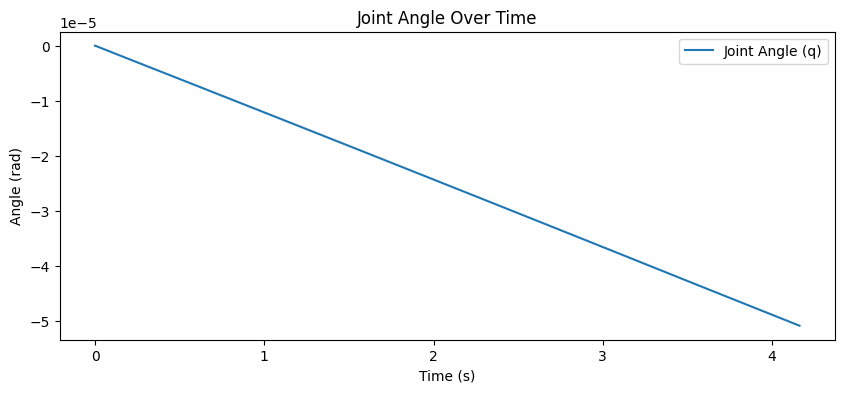

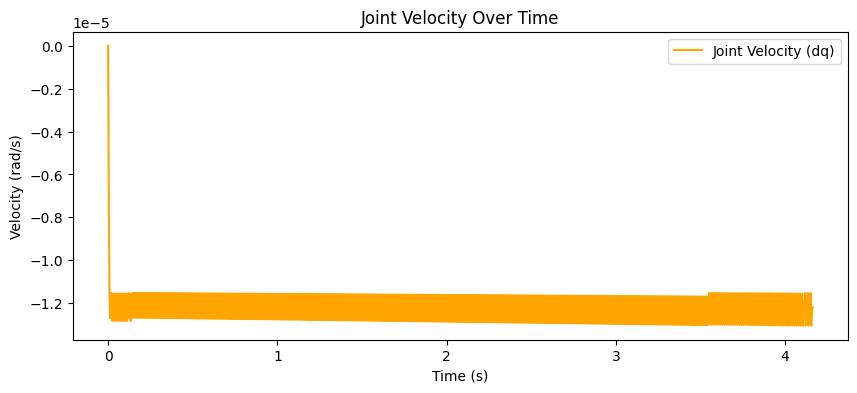

In [2]:
import matplotlib.pyplot as plt

# Set the time step (dt) used in the simulation
dt = 1.0 / 240.0
time_axis = np.arange(trajectory.shape[0]) * dt

# Plot joint angle (q) over time
plt.figure(figsize=(10, 4))
plt.plot(time_axis, trajectory[:, 0], label="Joint Angle (q)")
plt.title("Joint Angle Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.legend()
plt.show()

# Plot joint velocity (dq) over time
plt.figure(figsize=(10, 4))
plt.plot(time_axis, trajectory[:, 1], label="Joint Velocity (dq)", color="orange")
plt.title("Joint Velocity Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (rad/s)")
plt.legend()
plt.show()


In [21]:
import pybullet as p
import pybullet_data
import numpy as np
import time

# Define the control_loop function
def control_loop(model=None, robot_id=robot_id, joint_index=13, dt=1/240, steps=1000):
    """
    Simple example: at each step, we do a naive search over possible torques
    and pick the one that gets us closer to the desired position q_des.
    Also records the state trajectory to a file.
    """
    q_des = 1.0  # Desired joint angle for demonstration
    torque_candidates = np.linspace(-50.0, 50.0, 11)  # Increased torque range

    trajectory = []
    
    for step in range(steps):
        # Get current state from PyBullet
        joint_state = p.getJointState(robot_id, joint_index)
        q, dq = joint_state[0], joint_state[1]
        current_state = np.array([q, dq], dtype=np.float32)
        
        # Record the current state
        trajectory.append(current_state.copy())

        best_torque = 0.0
        best_error = float('inf')

        # Evaluate each candidate torque
        for tau in torque_candidates:
            # Naive Euler integration: predict next state
            q_pred = current_state[0] + current_state[1] * dt
            dq_pred = current_state[1] + tau * dt
            next_state = np.array([q_pred, dq_pred])
            error = abs(next_state[0] - q_des)
            if error < best_error:
                best_error = error
                best_torque = tau

        # Apply the best torque to the robot
        p.setJointMotorControl2(
            robot_id,
            joint_index,
            controlMode=p.TORQUE_CONTROL,
            force=best_torque
        )

        p.stepSimulation()
        # Optional sleep for real-time pacing: time.sleep(dt)

    trajectory = np.array(trajectory)
    np.save("control_loop_output.npy", trajectory)
    print("Control loop completed. Trajectory saved to 'control_loop_output.npy'.")

# Set up PyBullet in DIRECT mode
physicsClient = p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.resetSimulation()
p.setGravity(0, 0, -9.81)

# Load a known URDF: we'll use r2d2.urdf since double_pendulum.urdf isn't available
robot_id = p.loadURDF("r2d2.urdf", [0, 0, 0.1])

# Optionally, you can print the joint info for r2d2 to select a valid joint index:
num_joints = p.getNumJoints(robot_id)
print("Number of joints in r2d2:", num_joints)
num_joints = p.getNumJoints(robot_id)
for j in range(num_joints):
    joint_info = p.getJointInfo(robot_id, j)
    print(j, joint_info[1], "type:", joint_info[2])  # name, type
  # Joint name

# Call the control loop on joint_index=0 (adjust if needed based on joint info)
control_loop(model=None, robot_id=robot_id, joint_index=0, dt=1/240, steps=1000)

p.disconnect()


Number of joints in r2d2: 15
0 b'base_to_right_leg' type: 4
1 b'right_base_joint' type: 4
2 b'right_front_wheel_joint' type: 0
3 b'right_back_wheel_joint' type: 0
4 b'base_to_left_leg' type: 4
5 b'left_base_joint' type: 4
6 b'left_front_wheel_joint' type: 0
7 b'left_back_wheel_joint' type: 0
8 b'gripper_extension' type: 1
9 b'left_gripper_joint' type: 0
10 b'left_tip_joint' type: 4
11 b'right_gripper_joint' type: 0
12 b'right_tip_joint' type: 4
13 b'head_swivel' type: 0
14 b'tobox' type: 4
Control loop completed. Trajectory saved to 'control_loop_output.npy'.


In [18]:
import numpy as np

# Load the saved trajectory
trajectory = np.load("control_loop_output.npy")

# Print basic information about the trajectory
print("Trajectory shape:", trajectory.shape)
print("First 5 steps:")
print(trajectory[:5])


Trajectory shape: (1000, 2)
First 5 steps:
[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


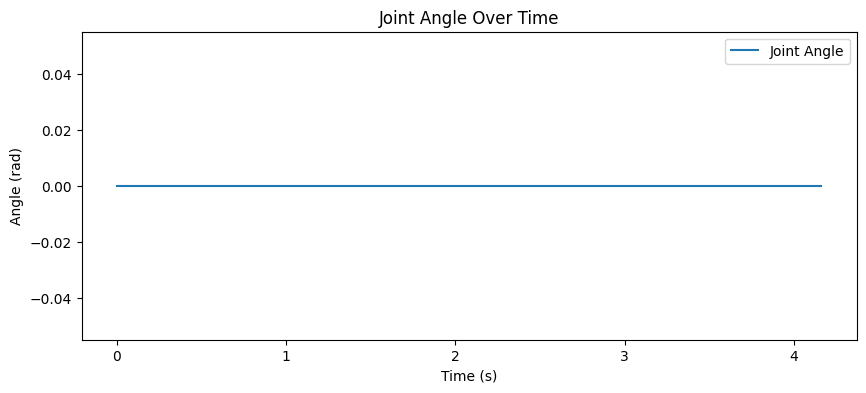

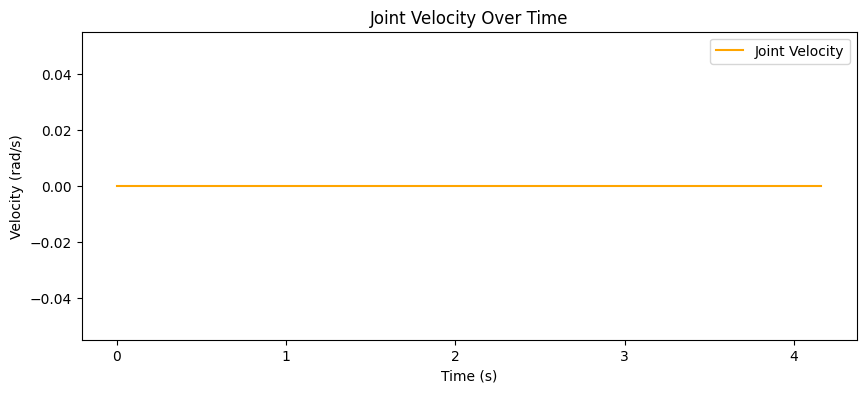

In [19]:
import matplotlib.pyplot as plt

# Define your simulation time step (dt)
dt = 1.0 / 240.0
time_axis = np.arange(trajectory.shape[0]) * dt

# Plot Joint Angle
plt.figure(figsize=(10, 4))
plt.plot(time_axis, trajectory[:, 0], label="Joint Angle")
plt.title("Joint Angle Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.legend()
plt.show()

# Plot Joint Velocity
plt.figure(figsize=(10, 4))
plt.plot(time_axis, trajectory[:, 1], label="Joint Velocity", color="orange")
plt.title("Joint Velocity Over Time")
plt.xlabel("Time (s)")
plt.ylabel("Velocity (rad/s)")
plt.legend()
plt.show()
